In [ ]:
class HeartLoader(torch.utils.data.Dataset):
    def __init__(self, imgs_paths, masks_paths):
        """ Simple image torch Dataset for images and masks in photo format """
        assert len(imgs_paths) == len(masks_paths)

        assert isinstance(imgs_paths, List)
        assert isinstance(imgs_paths[0], str)
        assert os.path.exists(imgs_paths[0])

        assert isinstance(masks_paths, List)
        assert isinstance(masks_paths[0], str)
        assert os.path.exists(masks_paths[0])

        # Save
        self.imgs_paths = imgs_paths
        self.masks_paths = masks_paths
        
    def choose_mask(self, mask):
        """ We need only 1 type """
        return np.where(mask == 255, 1., 0.).astype(np.float32)
            
    def __getitem__(self, index):

        img = cv2.imread(self.imgs_paths[index])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = self.preprocess(img)
        # img = self.normalize(img)
        img = np.transpose(img, (2, 0, 1))

        mask = cv2.imread(self.masks_paths[index], 0)   # 0 meanks Like a grayscale
        # mask = preprocess(mask)
        mask = self.choose_mask(mask)
        # mask = self.posprocess(mask)
        mask = np.expand_dims(mask, 0)
        
        # mask = mask.squeeze(0)

        return img.astype(np.float32), mask.astype(np.float32)

    def __len__(self):
        return len(self.imgs_paths)

    def preprocess(self, data):
        # Resize or something else the same
        return data / 255

    def posprocess(self, data):
        # mask = mask.squeeze(0)
        pass


# Restore images to suitable images of opencv style
def ImgForPlot(img):
    # img = np.einsum('ijk->jki', img)
    # img = (127.5*(img+1)).astype(np.uint8)
    return np.transpose(img, (1, 2, 0))
     


In [ ]:
import torch
from torchvision.transforms import v2

H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = transforms(img)

In [ ]:
v2.RandomHorizontalFlip([p])   # p is probability
v2.RandomVerticalFlip([p])
v2.RandomRotation
v2.RandomChannelPermutation
v2.GaussianBlur
v2.GaussianNoise

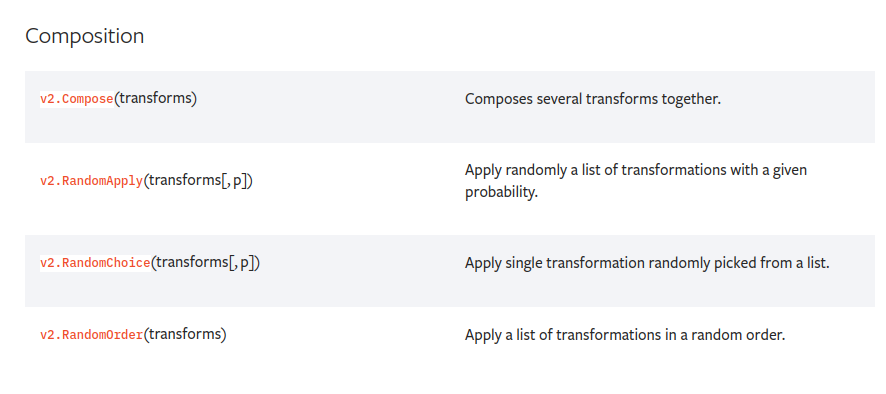

In [ ]:
p =

all_transforms = v2.Compose([
    v2.RandomHorizontalFlip(p),   # p is probability
    v2.RandomVerticalFlip([p]), 
    v2.RandomRotation, 
    v2.RandomChannelPermutation, 
    v2.GaussianBlur,
    v2.GaussianNoise,

    v2.ToDtype(torch.float32, scale=True),
])
transforms = 

In [ ]:
class TorchDataset(Dataset):
    def __init__(self, path, transforms=None, num=None):
        super(TorchDataset, self).__init__()

        self.transforms = transforms
        

    def __getitem__(self, index):
        img = []
        label = []

        if self.transforms is not None:
            img = self.transforms(img)

        return np.asarray(img), label

    def __len__(self):
        return len(self.labels)